In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [9]:
#transform an image to pytorch tensor
transform = transforms.ToTensor()
#fetch and download MNIST under './data' folder
mnisit_data = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnisit_data, batch_size=64,
                                          shuffle=True)

In [11]:
dataiter = iter(data_loader)
#out image has value between tensor(0.) and tensor(1.) ---> sigmoid
#if the value between tensor(-1.) and tensor(1.) ---> nn.Tanh
for images, labels in dataiter:
    print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.)

In [13]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # N, pictures are 784(28*28)pixel in this dataset
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),# N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3), #->N,3
            ) 
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784), #->N,784
            nn.Sigmoid()
            ) 
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
#    

In [15]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [16]:
#training
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img,_) in data_loader:
        #(batch_size, 28, 28) -> (batch_size, 784)
        # -1 : auto compute axis length
        img = img.reshape(-1,784)
        recon = model(img)
        loss = criterion(recon,img)
        # Gradients accumulate after each backward pass, so resetting them to zero at the start of each iteration 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch,img,recon))

Epoch:1, Loss:0.0443
Epoch:2, Loss:0.0438
Epoch:3, Loss:0.0402
Epoch:4, Loss:0.0388
Epoch:5, Loss:0.0394
Epoch:6, Loss:0.0368
Epoch:7, Loss:0.0409
Epoch:8, Loss:0.0372
Epoch:9, Loss:0.0367
Epoch:10, Loss:0.0327


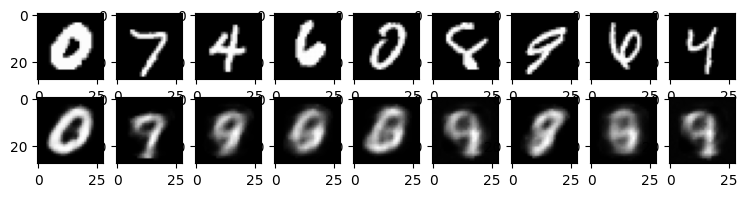

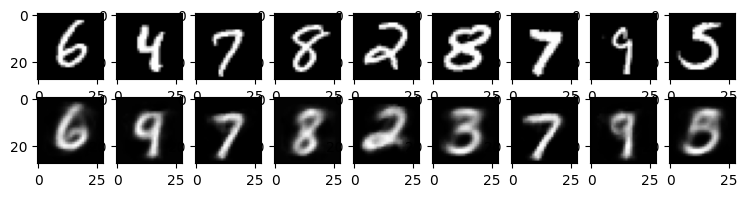

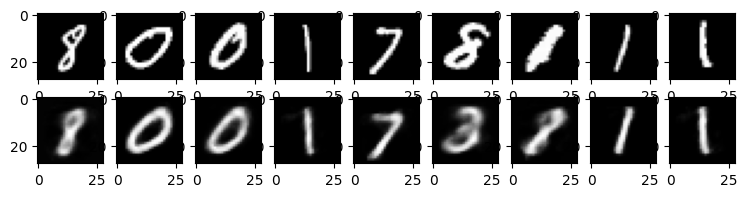

In [17]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    #tensor -> numpy
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i,item in enumerate(imgs):
        if i>=9: break
        plt.subplot(2,9,i+1)
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])
    for i,item in enumerate(recon):
        if i>=9: break
        plt.subplot(2,9,9+i+1) #row_length
        item = item.reshape(-1,28,28)
        plt.imshow(item[0])